#  Data analysis for titanic
Notebook inspired from [Basic Workflow Introduction](https://www.kaggle.com/vikumsw/beginners-basic-workflow-introduction)  
The data is stored in dataset.csv

1. [Exploratory data analysis](#eda)
2. [Machine Learning](#machine-learning)

## Exploratory data analysis <a name="eda">
Search correlation between features

In [22]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data cleaning

In [23]:
data = pd.read_csv("dataset.csv")
types = data.select_dtypes(include=['object']).copy()
print('Data before cleaning:')
display(data.head(2))
print('Memory before data cleaning {}'.format(data.memory_usage(deep=True).sum()))

data['sex'] = data['sex'].astype('category')
data['survived'] = data['survived'].astype('bool')
# Change Object columns to numeric
data[['age', 'ticket', 'fare', 'boat', 'body']] = data[['age', 'ticket', 'fare', 'boat', 'body']].apply(pd.to_numeric, errors='coerce')
print('Memory after data cleaning {}'.format(data.memory_usage(deep=True).sum()))

# Extract Initial from names
data['initial'] = data['name'].str.extract('([A-Za-z]+)\.')
data['initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
means = data.groupby('initial')['age'].mean().round(0)
# Fill null age values 
data['age'] = np.where(data['age'].isnull(), means[data['initial']], data['age'])

#
data[['home', 'dest']] = data['home.dest'].str.split(' / ', expand=True, n=1)
data['dest']  = data['dest'].str.extract('([A-Z]+)$')

data.head(2)

Data before cleaning:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"


Memory before data cleaning 890831
Memory after data cleaning 450528


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial,home,dest
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160.0,211.3375,B5,S,2.0,NaN,"St Louis, MO",Miss,"St Louis, MO",NaN
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781.0,151.5500,C22 C26,S,11.0,NaN,"Montreal, PQ / Chesterville, ON",Master,"Montreal, PQ",ON


## Survived

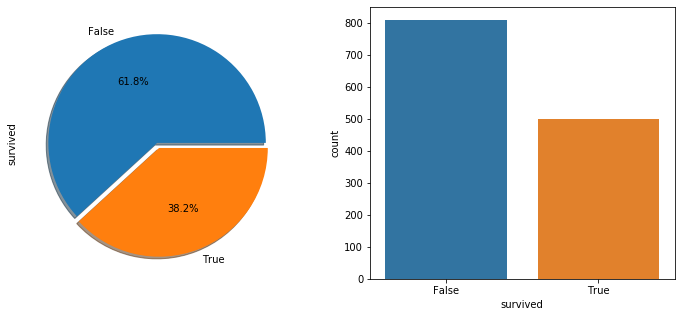

In [24]:
f, ax = plt.subplots(1,2,figsize=(12,5))
data['survived'].value_counts().plot.pie(explode=[0,0.05],autopct='{:1.1f}%'.format, ax=ax[0], shadow=True)
sns.countplot('survived', data=data, ax=ax[1])

### Sex 
From the bars it's clear that sex is a good factor for surviving 

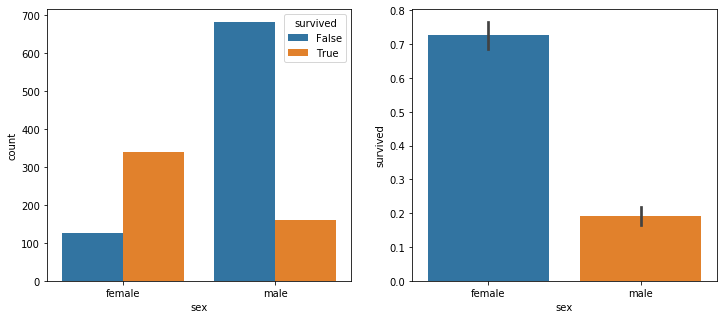

In [25]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='sex', hue='survived', data=data, ax=ax[0])
sns.barplot(data['sex'], data['survived'],ax=ax[1])

### Pclass
People with first class survived more becouse they were on the higher level of the titanic

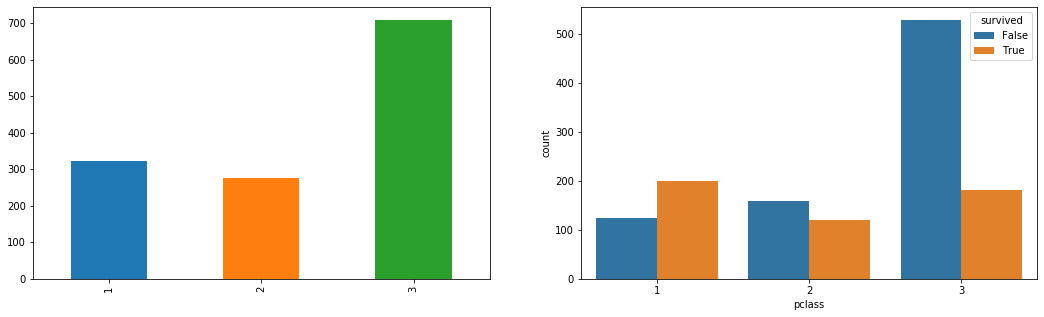

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,5))
data['pclass'].value_counts(sort=False).plot.bar(ax=ax[0], color=['C0', 'C1', 'C2'])
sns.countplot('pclass', hue='survived', data=data, ax=ax[1])

### Age
Childs had more changes to survive becouse they had priority

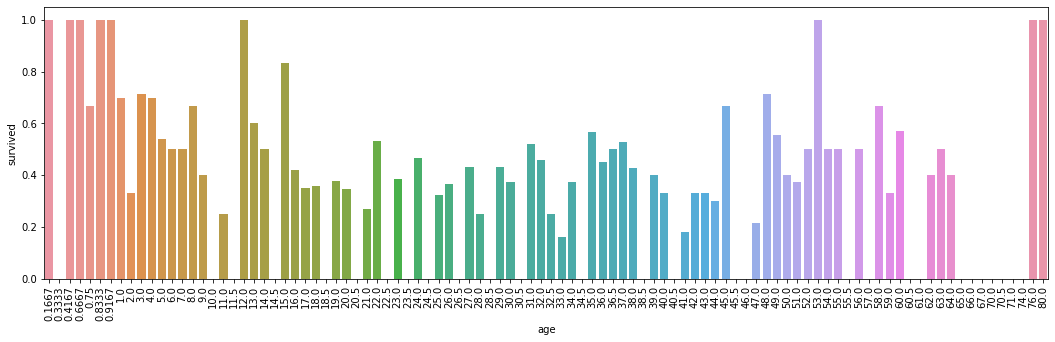

In [27]:
plt.figure(figsize=(18,5))
sns.barplot(data['age'], data['survived'], ci=None)
plt.xticks(rotation=90);

In [28]:
pd.crosstab(data['initial'], data['sex']).T.style.background_gradient('summer_r')

initial,Dona,Master,Miss,Mr,Mrs,Other
sex,,,,,,
female,1,0,265,1,199,0
male,0,61,0,769,0,13


In [29]:
data['age_bin'] = pd.cut(data['age'], 5)
data.groupby(['age_bin'])['survived'].mean().to_frame().style.background_gradient('summer_r')

,survived
age_bin,
"(0.0869, 16.133]",0.542254
"(16.133, 32.1]",0.394783
"(32.1, 48.067]",0.310782
"(48.067, 64.033]",0.443396
"(64.033, 80.0]",0.153846


### Embarked
People that embarked from C had more changes to survive becouse there were more with higher class

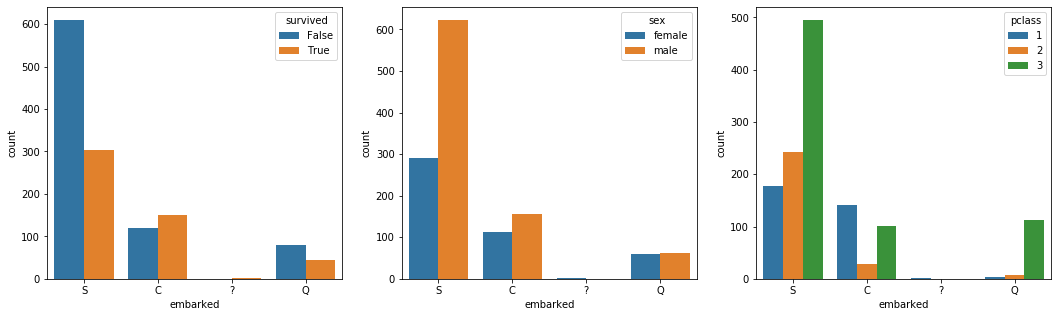

In [30]:
fig, ax = plt.subplots(1,3,figsize=(18, 5))
sns.countplot('embarked', hue='survived', data=data, ax=ax[0])
sns.countplot('embarked', hue='sex', data=data, ax=ax[1])
sns.countplot('embarked', hue='pclass', data=data, ax=ax[2])

### Fare
Fare is connected with pclass and it's a cleat factor of surviving

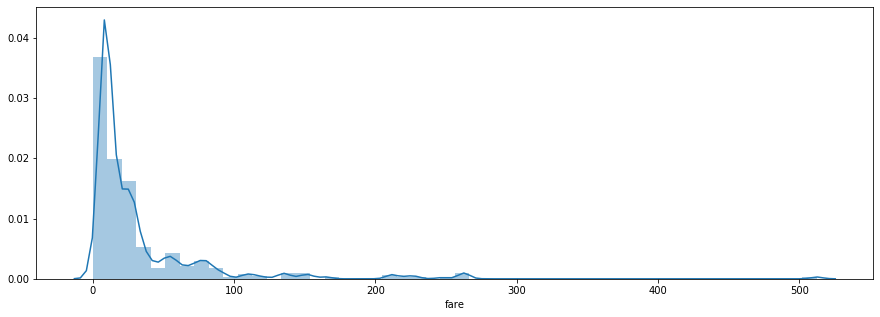

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(data['fare'].dropna())

In [32]:
data['fare_bin'] = pd.qcut(data['fare'], 6)
data.groupby(['fare_bin'])['survived'].mean().to_frame().style.background_gradient('summer_r')

,survived
fare_bin,
"(-0.001, 7.775]",0.245763
"(7.775, 8.662]",0.192661
"(8.662, 14.454]",0.334975
"(14.454, 26.0]",0.413333
"(26.0, 53.1]",0.45283
"(53.1, 512.329]",0.668224


### Dest
Oddly passegers with NY destination survived more, maybe becouse it's connected with sex

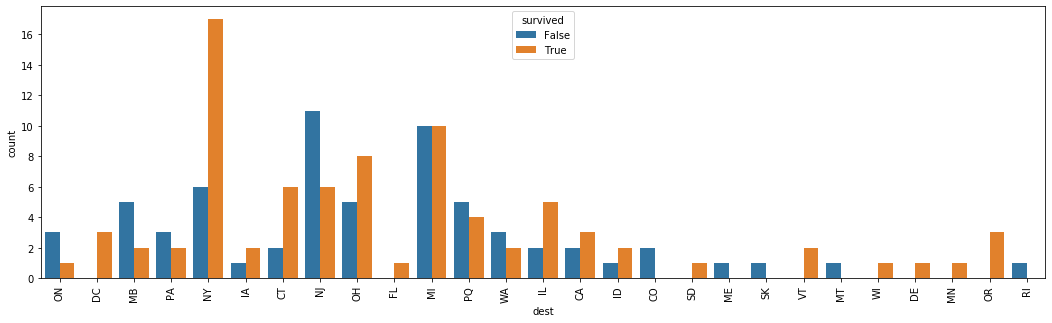

In [33]:
plt.figure(figsize=(18,5))
sns.countplot(data['dest'], hue=data['survived'])
plt.xticks(rotation=90);


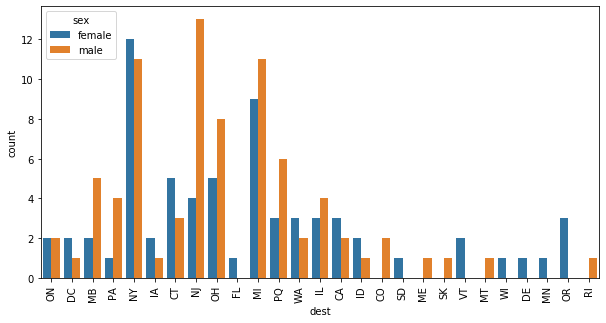

In [34]:
plt.figure(figsize=(10,5))
sliceData = data.loc[data['dest'] == 'MI']
sns.countplot('dest', hue=data['sex'], data=data)
plt.xticks(rotation=90);

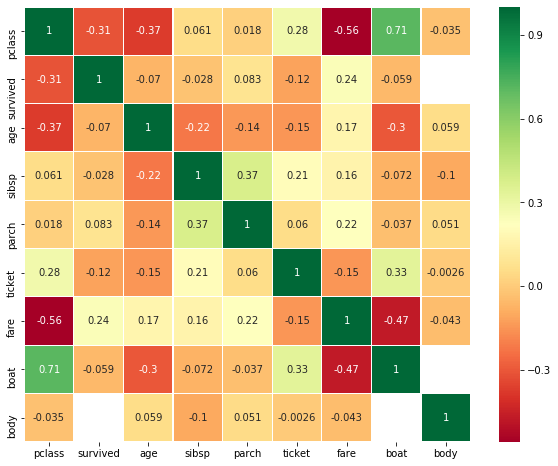

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linewidths=0.2)

## Machine learning  <a name="machine-learning">
### Converting features to model ready data

In [36]:
d = data.copy()
d['survived'] = d['survived'].astype('category').cat.codes
d['sex'] = d['sex'].cat.codes
d['embarked'] = d['embarked'].astype('category').cat.codes
d['initial'] = d['initial'].astype('category').cat.codes
d['fare_bin'] = d['fare_bin'].cat.codes
d['age_bin'] = d['age_bin'].cat.codes
d.drop(['name','age','sibsp','parch','ticket','fare','cabin','boat','body', 'home.dest', 'home', 'dest'],axis=1,inplace=True)
d.head()

,pclass,survived,sex,embarked,initial,age_bin,fare_bin
0,1,1,0,3,2,1,5
1,1,1,1,3,1,0,5
2,1,0,0,3,2,0,5
3,1,0,1,3,3,1,5
4,1,0,0,3,4,1,5


### Model 

In [37]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure

In [38]:
train_X, test_X = train_test_split(d, shuffle=True,  random_state=0, stratify=d['survived'])
train_Y=train_X.pop('survived')
test_Y = test_X.pop('survived')
X = d.drop('survived', axis=1)
Y = d['survived']

In [39]:
model = LogisticRegression(C=0.05, solver='liblinear')
model.fit(train_X, train_Y)
LR_prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression model is \t',metrics.accuracy_score(LR_prediction,test_Y))

# Naive Bayes
model=GaussianNB()
model.fit(train_X,train_Y.values.ravel())
NB_prediction=model.predict(test_X)
print('The accuracy of the NaiveBayes model is\t\t\t',metrics.accuracy_score(NB_prediction,test_Y))

# Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
DT_prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is \t\t\t',metrics.accuracy_score(DT_prediction,test_Y))

# Random Forest
model=RandomForestClassifier(n_estimators=500)
model.fit(train_X,train_Y)
RF_prediction=model.predict(test_X)
print('The accuracy of the Random Forests model is \t\t',metrics.accuracy_score(RF_prediction,test_Y))

The accuracy of the Logistic Regression model is 	 0.7804878048780488
The accuracy of the NaiveBayes model is			 0.7713414634146342
The accuracy of the Decision Tree is 			 0.8048780487804879
The accuracy of the Random Forests model is 		 0.801829268292683


                         CV mean       std
LogisticRegression      0.628817  0.121947
GaussianNB              0.623467  0.118123
DecisionTreeClassifier  0.622704  0.118887
RandomForestClassifier  0.631104  0.115073


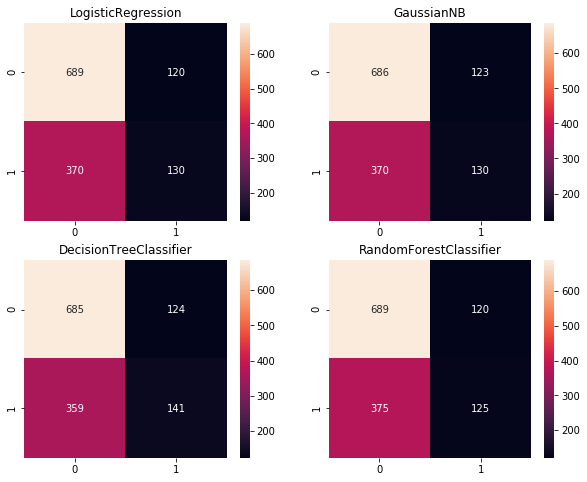

In [40]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

f, axarr = plt.subplots(2,2, figsize=(10,8))

kfold = KFold(n_splits=2, random_state=22)
models = [LogisticRegression(C=0.05, solver='liblinear'), GaussianNB(), 
          DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100)]

cv_results = pd.DataFrame(columns= ['CV mean', 'std'])
for m, ax in zip(models, axarr.flat):
    result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    result_df = pd.DataFrame([[result.mean(), result.std()]], columns=['CV mean', 'std'], index = [m.__class__.__name__])
    cv_results = cv_results.append(result_df)
    
    y_pred = cross_val_predict(model, X, Y, cv=kfold)
    ax.set_title(m.__class__.__name__)
    sns.heatmap(confusion_matrix(Y, y_pred), ax=ax, annot=True, fmt='2.0f')
    
print(cv_results)



In [41]:
from sklearn.model_selection import GridSearchCV

n_estimators = range(100,1000,100)
hyper = { 'n_estimators' : n_estimators }
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=10), param_grid=hyper, verbose=True, cv=2)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6187929717341482
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    9.8s finished


### Feature Importance

The score is 0.8109756097560976


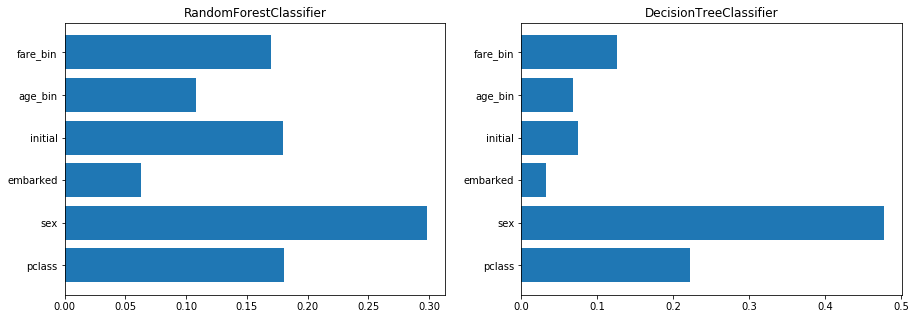

In [42]:
from sklearn.ensemble import VotingClassifier

f, axarr = plt.subplots(1,2,figsize=(15,5))
estimators=[('RFor',RandomForestClassifier(n_estimators=100,random_state=0)),
            ('DT',DecisionTreeClassifier())]

ensemble = VotingClassifier(estimators=estimators, voting='soft')
ensemble.fit(train_X, train_Y)
print(f'The score is {ensemble.score(test_X, test_Y)}')

for est, ax in zip(ensemble.estimators_, axarr.flat):
    ax.barh( train_X.columns, est.feature_importances_)
    ax.set_title(est.__class__.__name__)